In [1]:
import pandas as pd
import numpy as np
#设置画图风格与图片中文字体
from matplotlib import pyplot as plt
plt.style.use("ggplot")
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)
#设置value的显示长度为100，默认为50
pd.set_option('max_colwidth',100)

# 导入数据与描述统计

In [2]:
data=pd.read_csv("data.csv")
#一般有两种编码模式，默认为utf-8,也可以用gbk
data=pd.read_csv("data.csv",encoding="utf-8")

In [3]:
data.shape

(18, 7)

In [4]:
data.head()

,年份,通过与否,分类,分类2,年龄,储蓄,KEY
0,2019.0,未通过,A,A,6.0,1500.00,123
1,2017.0,未通过,A,NaN,3.0,NaN,123
2,2019.0,未通过,A,A,17.0,1150.00,124
3,2018.0,未通过,NaN,A,5.0,222.22,124
4,2017.0,未通过,B,A,14.0,534.40,567


In [5]:
#groupby
data[["年份","通过与否"]].groupby("年份").count()
#这里也可以将count()改成你想要的函数，比如sum、median

,通过与否
年份,
2016.0,2
2017.0,3
2018.0,2
2019.0,9


In [6]:
data[["年份","通过与否"]].groupby("年份").count().T

年份,2016.0,2017.0,2018.0,2019.0
通过与否,2,3,2,9


In [7]:
data.describe()
#同样也可以用.T进行转置操作

,年份,年龄,储蓄,KEY
count,17.000000,17.0,14.000000,18.000000
mean,2018.176471,11.0,1942.401429,353.277778
std,1.131111,5.5,1587.257135,261.481707
min,2016.000000,3.0,222.220000,123.000000
25%,2017.000000,6.0,1000.000000,123.250000
50%,2019.000000,10.0,1375.000000,240.000000
75%,2019.000000,14.0,2850.000000,561.750000
max,2019.000000,21.0,5000.000000,879.000000


# 数据清洗

In [8]:
#删除空值太多的行（这里是每行空值大于等于2个）
isdrop=[]
for index,row in data.iterrows():
    if row.isna().sum()>=2:
        isdrop.append(1)
    else:
        isdrop.append(0)
data.insert(loc=0,column="isdrop",value=pd.array(isdrop))

In [9]:
#通过选择isdrop为0的行，就可以提取对应空值少的数据。
data.head()

,isdrop,年份,通过与否,分类,分类2,年龄,储蓄,KEY
0,0,2019.0,未通过,A,A,6.0,1500.00,123
1,1,2017.0,未通过,A,NaN,3.0,NaN,123
2,0,2019.0,未通过,A,A,17.0,1150.00,124
3,0,2018.0,未通过,NaN,A,5.0,222.22,124
4,0,2017.0,未通过,B,A,14.0,534.40,567


In [74]:
#按KEY去重
datacln=data.drop_duplicates("KEY")
datacln

,isdrop,年份,通过与否,分类,分类2,年龄,储蓄,KEY
0,0,2019.0,未通过,A,A,6.0,1500.0,123
2,0,2019.0,未通过,A,A,17.0,1150.0,124
4,0,2017.0,未通过,B,A,14.0,534.4,567
5,1,2019.0,未通过,B,NaN,6.0,NaN,879
6,0,2016.0,未通过,C,A,8.0,5000.0,342
7,0,2019.0,NaN,C,B,8.0,1800.0,234
9,0,2019.0,通过,NaN,B,11.0,5000.0,246
10,0,NaN,通过,D,B,17.0,1000.0,754
11,0,2019.0,通过,D,NaN,14.0,1250.0,785
14,0,2017.0,通过,E,B,NaN,3200.0,546


In [75]:
#去空
datadropna=data.dropna()
datadropna

,isdrop,年份,通过与否,分类,分类2,年龄,储蓄,KEY
0,0,2019.0,未通过,A,A,6.0,1500.0,123
2,0,2019.0,未通过,A,A,17.0,1150.0,124
4,0,2017.0,未通过,B,A,14.0,534.4,567
6,0,2016.0,未通过,C,A,8.0,5000.0,342
12,0,2019.0,通过,D,B,10.0,1000.0,234
15,0,2019.0,通过,E,B,20.0,3437.0,342
16,0,2018.0,通过,E,B,13.0,1600.0,123
17,0,2019.0,通过,E,B,9.0,500.0,567


In [76]:
#填充空值(可以把0换成对应中位数、均值)
datafillna=data.fillna(0)
datafillna

,isdrop,年份,通过与否,分类,分类2,年龄,储蓄,KEY
0,0,2019.0,未通过,A,A,6.0,1500.00,123
1,1,2017.0,未通过,A,0,3.0,0.00,123
2,0,2019.0,未通过,A,A,17.0,1150.00,124
3,0,2018.0,未通过,0,A,5.0,222.22,124
4,0,2017.0,未通过,B,A,14.0,534.40,567
5,1,2019.0,未通过,B,0,6.0,0.00,879
6,0,2016.0,未通过,C,A,8.0,5000.00,342
7,0,2019.0,0,C,B,8.0,1800.00,234
8,0,2016.0,未通过,C,B,21.0,0.00,123
9,0,2019.0,通过,0,B,11.0,5000.00,246


# 数据缩尾

In [95]:
#x是列，a,b是想要进行切分的位置
def cap(x,a,b):
    qa=x.quantile(a)
#     print(qa)
    qb=x.quantile(b)
#     print(qb)
    for i in x:
        if i <=qa :
            x.replace(i,qa,inplace = True)
        if i >=qb:
            x.replace(i,qb,inplace = True)
#     print(pd.DataFrame(x).describe())
    return x

In [96]:
data=pd.read_csv("data.csv")

In [97]:
#直接进行缩尾处理
datacap=pd.DataFrame.copy(data)
cols=datacap.describe().columns
for cols in cols:
    datacap.replace(datacap[cols],cap(datacap[cols],0.1,0.9),inplace=True)
print(data.max(),datacap.max(),sep="\n\n")

年份     2019.0
年龄       21.0
储蓄     5000.0
KEY     879.0
dtype: float64

年份     2019.0
年龄       18.2
储蓄     4531.1
KEY     763.3
dtype: float64


In [99]:
#显示所有数据形状
print(data.shape)
#提取通过的数据
datapass=pd.DataFrame.copy(data[data["通过与否"]=="通过"])
print(datapass.shape)
#提取未通过的数据
datafail=pd.DataFrame.copy(data[data["通过与否"]=="未通过"])
print(datafail.shape)
#分组进行缩尾
cols=datapass.describe().columns
for cols in cols:
    datapass.replace(datapass[cols],cap(datapass[cols],0.1,0.9),inplace=True)
    datafail.replace(datafail[cols],cap(datafail[cols],0.1,0.9),inplace=True)

(18, 7)
(9, 7)
(8, 7)


# 数据分布

In [107]:
#找到数字相关的指标所在列
data.describe().columns

Index(['年份', '年龄', '储蓄', 'KEY'], dtype='object')

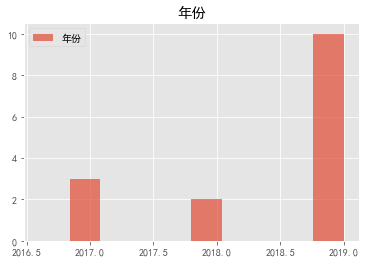

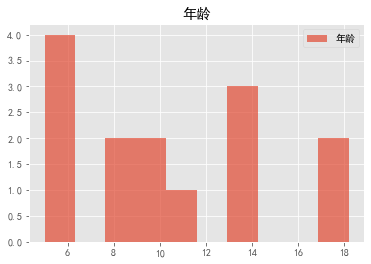

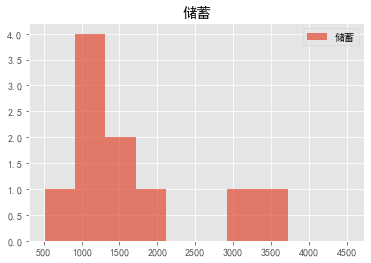

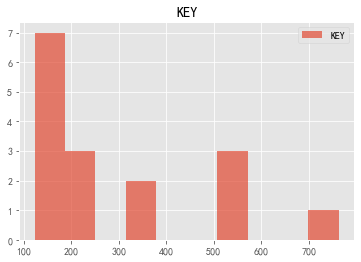

In [111]:
#查看数字分布，用直方图绘制，range可以通过quantile函数来排除极端点
for columns in data.describe().columns:
    plt.figure()
    plt.title(columns)
    plt.hist(data[columns],range=(data[columns].quantile(0.1),data[columns].quantile(0.9)),label=columns,alpha=0.7)
    plt.legend()

# 对比画图

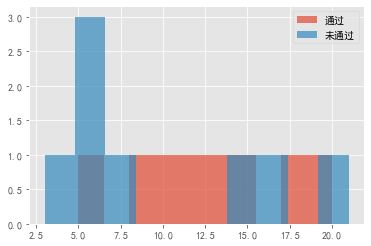

In [118]:
#分组画图
#企业年龄
for columns in ["年龄" ]:
    plt.figure()
#     plt.title(columns+"分布\n",loc="center",fontsize=18)
    plt.hist(data[data["通过与否"]=="通过"][columns],label="通过",alpha=0.7)
#     plt.figure()
    plt.hist(data[data["通过与否"]=="未通过"][columns],label="未通过",alpha=0.7)
    plt.legend()

# 导出表格

In [112]:
data[["年份","通过与否"]].groupby("年份").count().T.to_csv("按年汇总.csv",encoding="gbk")

# 数据检验

In [113]:
#均值检验结果
meantest=[]
np.array(meantest)
#中位数检验结果
mediantest=[]
np.array(mediantest)
from scipy import stats as st
#检验
cols=["年龄","储蓄"]
for cols in cols:
    meantest.append
    t,p=st.ttest_ind(datapass[cols].dropna(),datafail[cols].dropna())[0:2]
    meantest.append([cols,t,p])
    t,p=st.median_test(datapass[cols].dropna(),datafail[cols].dropna())[0:2]
    mediantest.append([cols,t,p])

In [114]:
#显示结果
print(meantest)
print(mediantest)
#python均值检验与中位数检验,P值小于0.05显著，说明两组数据均值与中位数存在差异
#导出结果
pd.DataFrame(meantest).to_csv("meantest.csv",encoding="gbk")
pd.DataFrame(mediantest).to_csv("mediantest.csv",encoding="gbk")   

[['年龄', 1.104911090660519, 0.28782591726173323], ['储蓄', 0.8296647392224226, 0.4243676439267027]]
[['年龄', 0.25, 0.6170750774519739], ['储蓄', 0.04836309523809534, 0.8259364898221998]]


In [115]:
data[["通过与否","年龄","储蓄"]].groupby("通过与否").mean()

,年龄,储蓄
通过与否,,
未通过,10.000,1681.324
通过,12.375,2123.375


# 区间统计

In [60]:
# 区间统计
classdata=data["年龄"]
classdata=np.array(classdata)
a=pd.cut(classdata,3)
b=pd.cut(classdata,[0,5,10,15,20,25])
print(a)
print(b)
pd.DataFrame(a).to_csv("classa.csv")
pd.DataFrame(b).to_csv("classb.csv")

[(2.982, 9.0], (2.982, 9.0], (15.0, 21.0], (2.982, 9.0], (9.0, 15.0], ..., (2.982, 9.0], NaN, (15.0, 21.0], (9.0, 15.0], (2.982, 9.0]]
Length: 18
Categories (3, interval[float64]): [(2.982, 9.0] < (9.0, 15.0] < (15.0, 21.0]]
[(5, 10], (0, 5], (15, 20], (0, 5], (10, 15], ..., (0.0, 5.0], NaN, (15.0, 20.0], (10.0, 15.0], (5.0, 10.0]]
Length: 18
Categories (5, interval[int64]): [(0, 5] < (5, 10] < (10, 15] < (15, 20] < (20, 25]]
